In [82]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


In [18]:
os.chdir(r'C:\Users\COMPUER\Desktop\DataScience\csv files')
os.getcwd()

'C:\\Users\\COMPUER\\Desktop\\DataScience\\csv files'

In [19]:
train = pd.read_csv('train_loan.csv')
test = pd.read_csv('test_loan.csv')
submission = pd.read_csv('sample_loan.csv')

In [20]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [22]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [34]:
train['LoanAmount'].value_counts

<bound method IndexOpsMixin.value_counts of 0        NaN
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64>

In [29]:
train.describe().T


,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [41]:

train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [56]:
train['Gender'].value_counts(dropna=False, normalize=True)
import seaborn as sns


<AxesSubplot:>

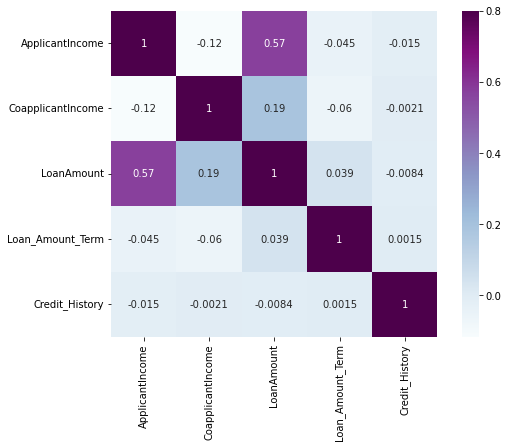

In [60]:
matrix = train.corr()
f = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

<AxesSubplot:>

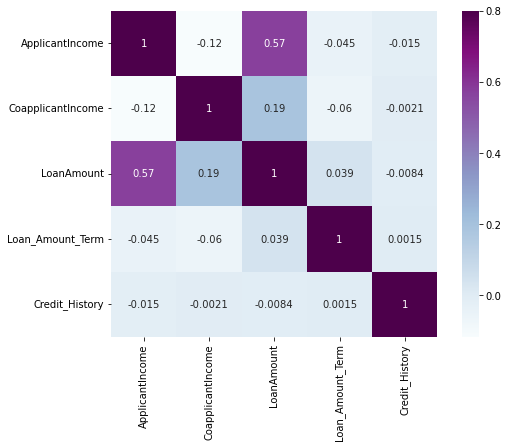

In [62]:
matrix = train.corr()
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

In [63]:

train.Gender=train.Gender.map({"Female":0,"Male":1})
train.Married=train.Married.map({"No":0,"Yes":1})
train.Self_Employed=train.Self_Employed.map({"No":0,"Yes":1})
train.Education=train.Education.map({"Not":1,"Graduate":0})
train.Property_Area=train.Property_Area.map({"Urban":0,"Rural":1})
train.Loan_Status=train.Loan_Status.map({"N":0,"Y":1})
train.Dependents=train.Dependents.map({"3+":3,"0":0,"1":1,"2":2})

test.Gender=test.Gender.map({"Female":0,"Male":1})
test.Married=test.Married.map({"No":0,"Yes":1})
test.Self_Employed=test.Self_Employed.map({"No":0,"Yes":1})
test.Education=test.Education.map({"Not":1,"Graduate":0})
test.Property_Area=test.Property_Area.map({"Urban":0,"Rural":1})
test.Dependents=test.Dependents.map({"3+":3,"0":0,"1":1,"2":2})

In [64]:
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
train["Married"].fillna(train["Married"].mode()[0],inplace=True)
train["Dependents"].fillna(train["Dependents"].mode()[0],inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)
train["Education"].fillna(train["Education"].mode()[0],inplace=True)
train["Property_Area"].fillna(train["Property_Area"].mode()[0],inplace=True)

In [65]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0],inplace=True)


In [66]:
train["LoanAmount"].fillna(train["LoanAmount"].median(),inplace=True)

In [67]:
test["Gender"].fillna(test["Gender"].mode()[0],inplace=True)
test["Married"].fillna(test["Married"].mode()[0],inplace=True)
test["Dependents"].fillna(test["Dependents"].mode()[0],inplace=True)
test["Self_Employed"].fillna(test["Self_Employed"].mode()[0],inplace=True)
test["Credit_History"].fillna(test["Credit_History"].mode()[0],inplace=True)
test["Education"].fillna(test["Education"].mode()[0],inplace=True)
test["Property_Area"].fillna(test["Property_Area"].mode()[0],inplace=True)

In [68]:
test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mode()[0],inplace=True)


In [69]:
test["LoanAmount"].fillna(test["LoanAmount"].median(),inplace=True)


In [71]:
train.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [72]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [73]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,128.0,360.0,1.0,0.0,1
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,1.0,0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,0.0,1
3,1.0,1.0,0.0,0.0,0.0,2583,2358.0,120.0,360.0,1.0,0.0,1
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,1.0,1
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,1.0,1
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,0.0,1
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,0.0,1


In [74]:
x=train.drop("Loan_Status",1)
y=train.Loan_Status

C:\Users\COMPUER\AppData\Local\Temp/ipykernel_15084/2647843999.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x=train.drop("Loan_Status",1)


In [75]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,128.0,360.0,1.0,0.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,1.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,0.0
3,1.0,1.0,0.0,0.0,0.0,2583,2358.0,120.0,360.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,0.0


In [78]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,128.0,360.0,1.0,0.0,1
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,1.0,0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,0.0,1
3,1.0,1.0,0.0,0.0,0.0,2583,2358.0,120.0,360.0,1.0,0.0,1
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,1.0,1
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,1.0,1
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,0.0,1
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,0.0,1


In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=102)


In [84]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)
pred_l=logmodel.predict(x_test)
acc_l=accuracy_score(y_test,pred_l)*100
acc_l

82.70270270270271

In [85]:
pred_test=logmodel.predict(test)